In [66]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns

In [5]:
os.getcwd()

'C:\\Users\\manie\\Downloads'

In [20]:
heart = pd.read_csv('heart.csv')
o2 = pd.read_csv('o2Saturation.csv')

In [21]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
o2.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [13]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
df = pd.concat([heart,o2],axis = 1,join = 'inner')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


In [27]:
df.rename(columns = {'98.6':'O2'})

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,O2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,97.5
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,97.5
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,97.5
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,97.5


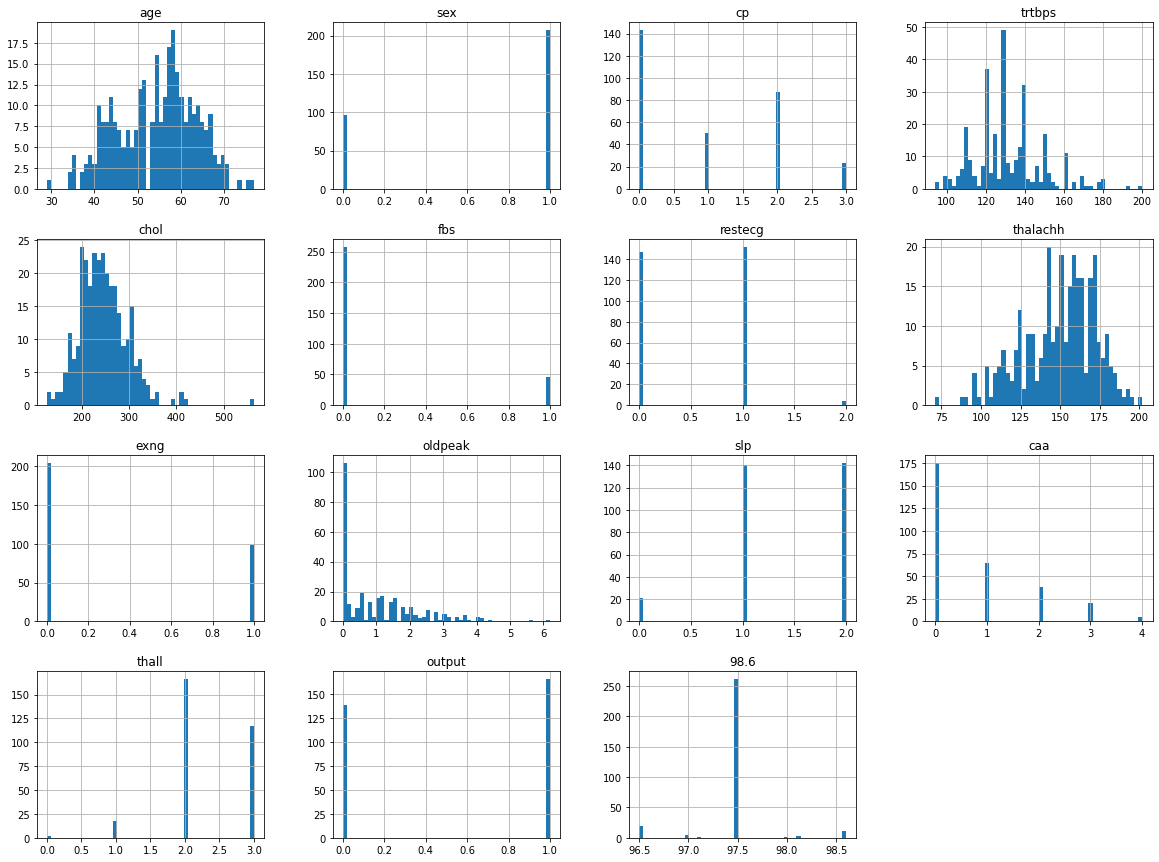

In [29]:
%matplotlib inline
df.hist(bins = 50,figsize = (20,15))
plt.show()

<AxesSubplot:xlabel='age', ylabel='thalachh'>

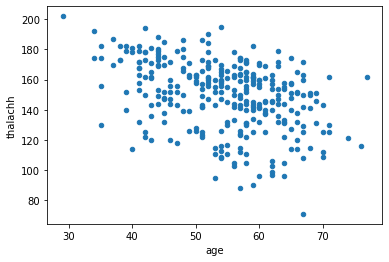

In [38]:
df.plot(kind = 'scatter',x = 'age',y = 'thalachh')

<AxesSubplot:xlabel='age', ylabel='chol'>

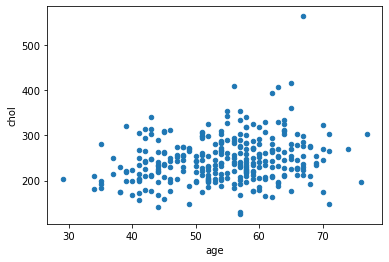

In [41]:
df.plot(kind = 'scatter',x = 'age',y = 'chol')

<AxesSubplot:xlabel='age', ylabel='trtbps'>

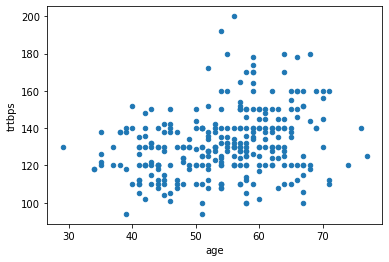

In [42]:
df.plot(kind = 'scatter', x = 'age',y = 'trtbps')

In [48]:
corr_matrix = df.corr()
corr_matrix['output'].sort_values(ascending = False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
98.6        0.309337
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

In [54]:
Y = df['output']
X = df.drop('output',axis = 1)

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [73]:
pipe_lr = Pipeline([('minmax',MinMaxScaler()), ('Logistic',LogisticRegression())])
pipe_RF = Pipeline([('minmax',MinMaxScaler()), ('Random Forest',RandomForestClassifier())])
pipe_DT = Pipeline([('minmax',MinMaxScaler()), ('Decision Tree',DecisionTreeClassifier())])

In [75]:
my_pipeline = (pipe_lr,pipe_RF,pipe_DT)
for i in my_pipeline:
    i.fit(X_train,y_train)
    print(i.score(X_test,y_test))
    

0.8852459016393442
0.8852459016393442
0.8524590163934426
